In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import math
from os import path
from scipy.stats import norm
from pykalman import KalmanFilter
# from sklearn.metrics import mean_squared_error

In [3]:
plt.rc('text', usetex=True)

inpath = "../../"

currentfile = "Imitator_2_2400.csv"

# Read from file
strdatatype = np.dtype([('N', np.int_, (2,)), ('Time_Count', np.int_ ), ('Mode', np.int_ ),
                            ('T', np.float_, (10,)), ('S', np.int_, (10,)), ('System_State', np.bool_ )])
N, Time_Count, Mode, T, S, System_State = np.loadtxt(path.join(inpath, currentfile),
        unpack=True, delimiter=';', skiprows=1, dtype=strdatatype)

In [4]:
dS = S[1:, :] - S[:-1, :]
arInds = np.ones(1) * 25

Mean period [0]: 54.0
Standard deviation [0]: 26.0
Lower CI boundary [0]: 31
Upper CI boundary [0]: 75
Last failure in dataset [0]: 2362
Failure prediction 1 [0]: 2416
Failure prediction 2 [0]: 2470
Mean period [1]: 57.0
Standard deviation [1]: 25.0
Lower CI boundary [1]: 34
Upper CI boundary [1]: 75
Last failure in dataset [1]: 2352
Failure prediction 1 [1]: 2408
Failure prediction 2 [1]: 2464
Mean period [2]: 56.0
Standard deviation [2]: 23.0
Lower CI boundary [2]: 34
Upper CI boundary [2]: 71
Last failure in dataset [2]: 2351
Failure prediction 1 [2]: 2406
Failure prediction 2 [2]: 2461
Mean period [3]: 56.0
Standard deviation [3]: 27.0
Lower CI boundary [3]: 37
Upper CI boundary [3]: 76
Last failure in dataset [3]: 2332
Failure prediction 1 [3]: 2401
Failure prediction 2 [3]: 2457
Mean period [4]: 53.0
Standard deviation [4]: 26.0
Lower CI boundary [4]: 33
Upper CI boundary [4]: 80
Last failure in dataset [4]: 2375
Failure prediction 1 [4]: 2428
Failure prediction 2 [4]: 2481
Mean 

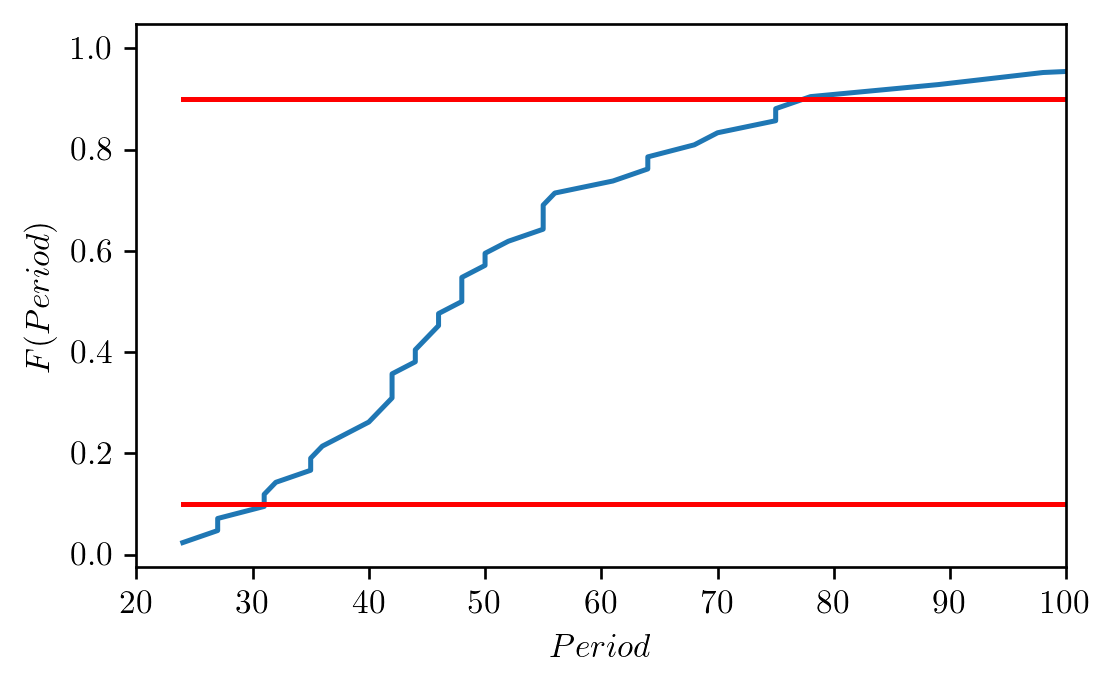

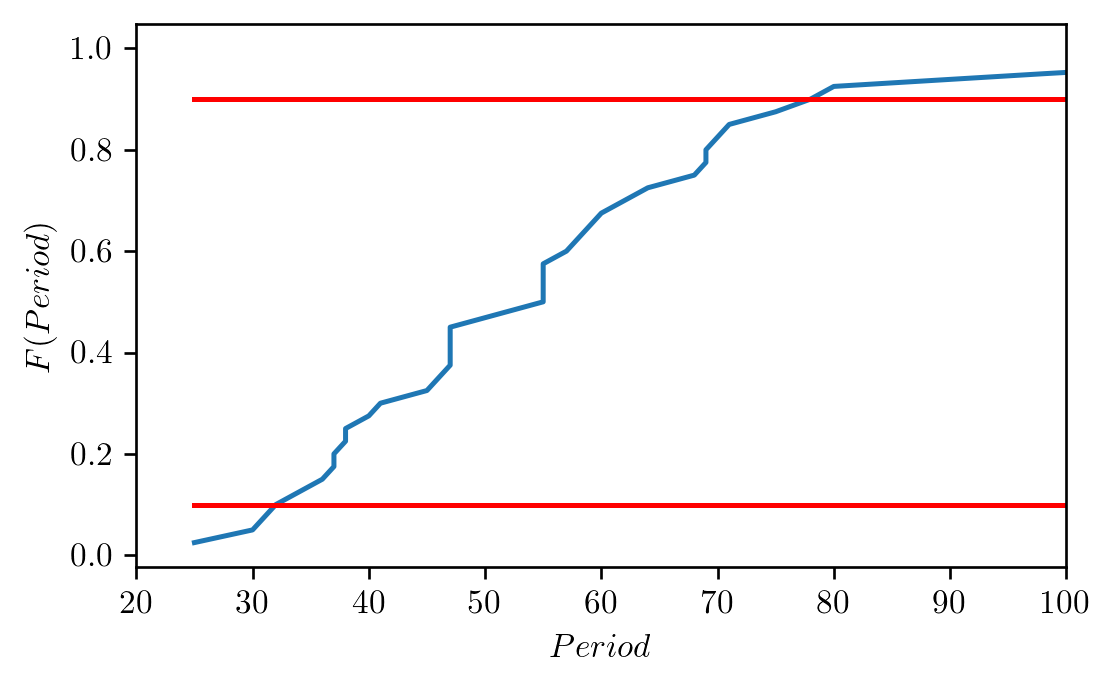

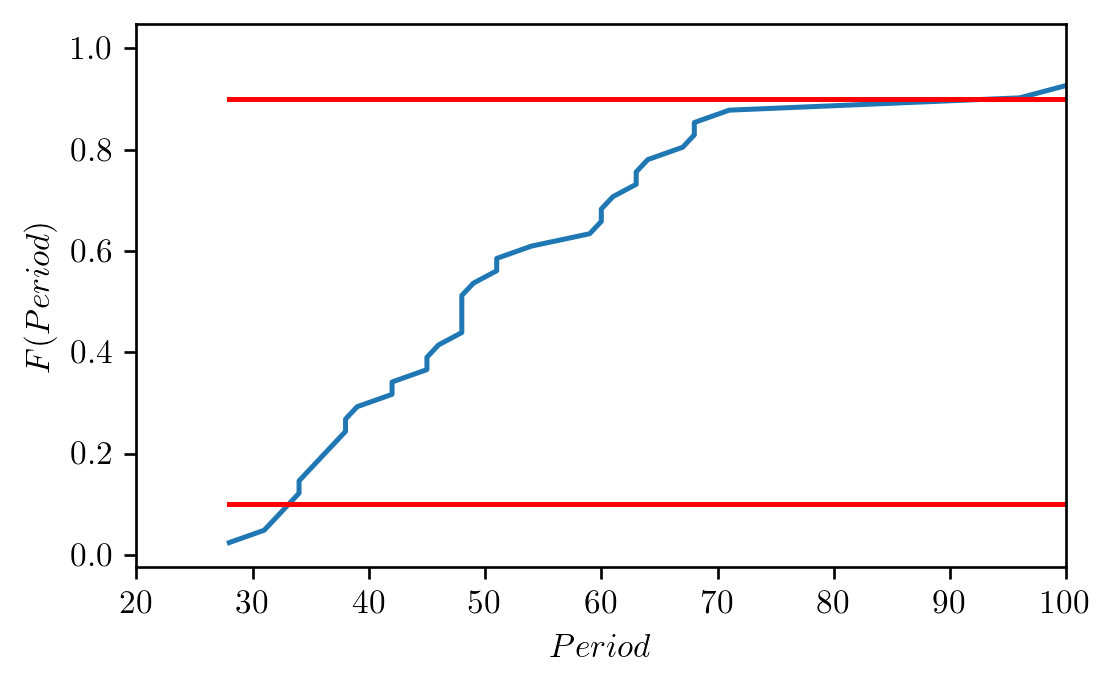

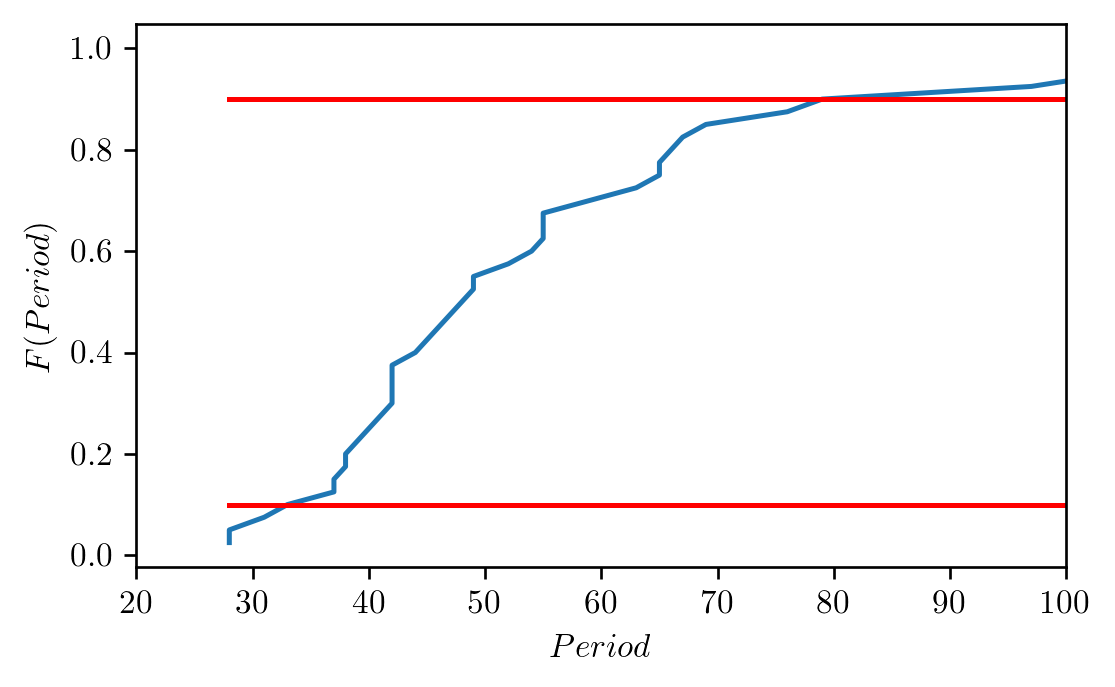

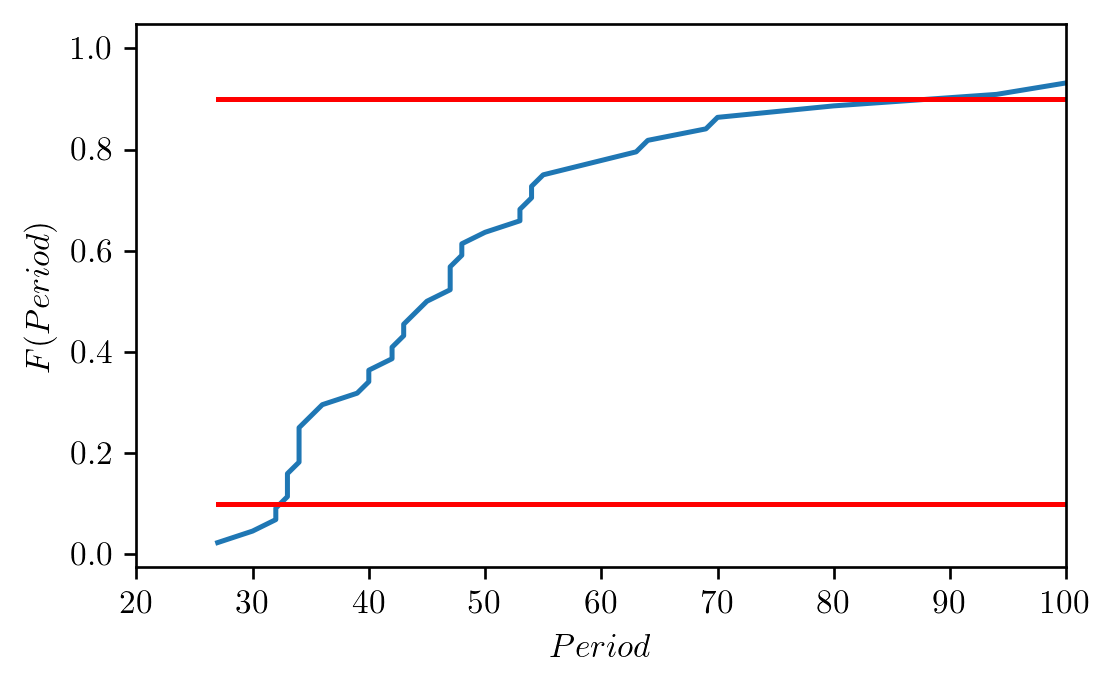

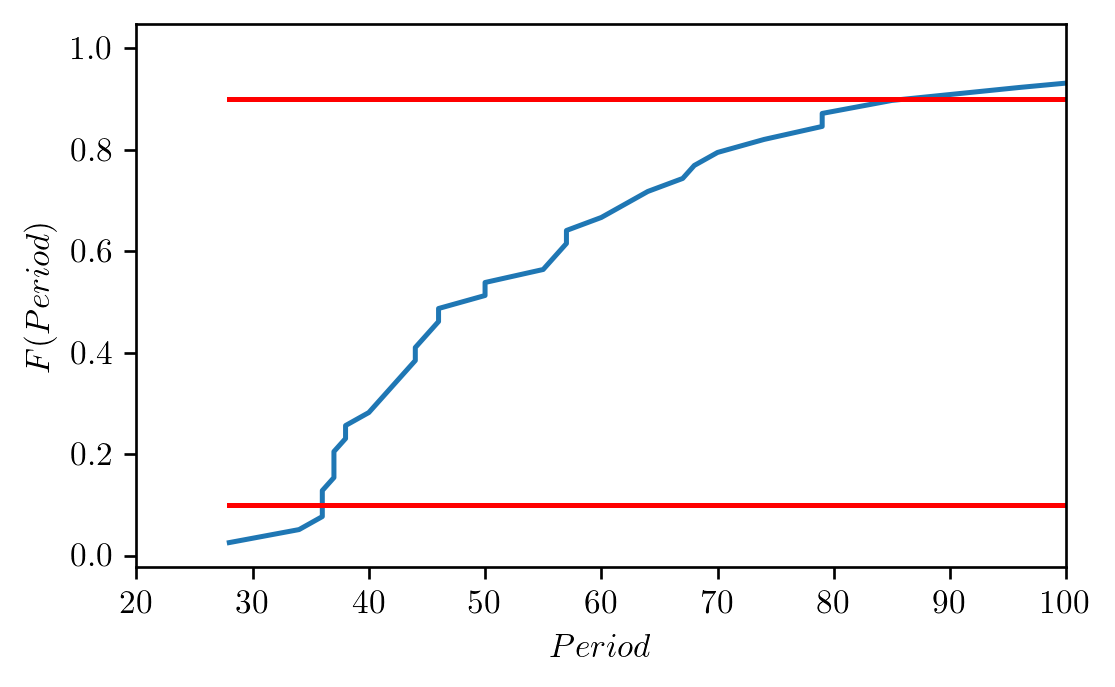

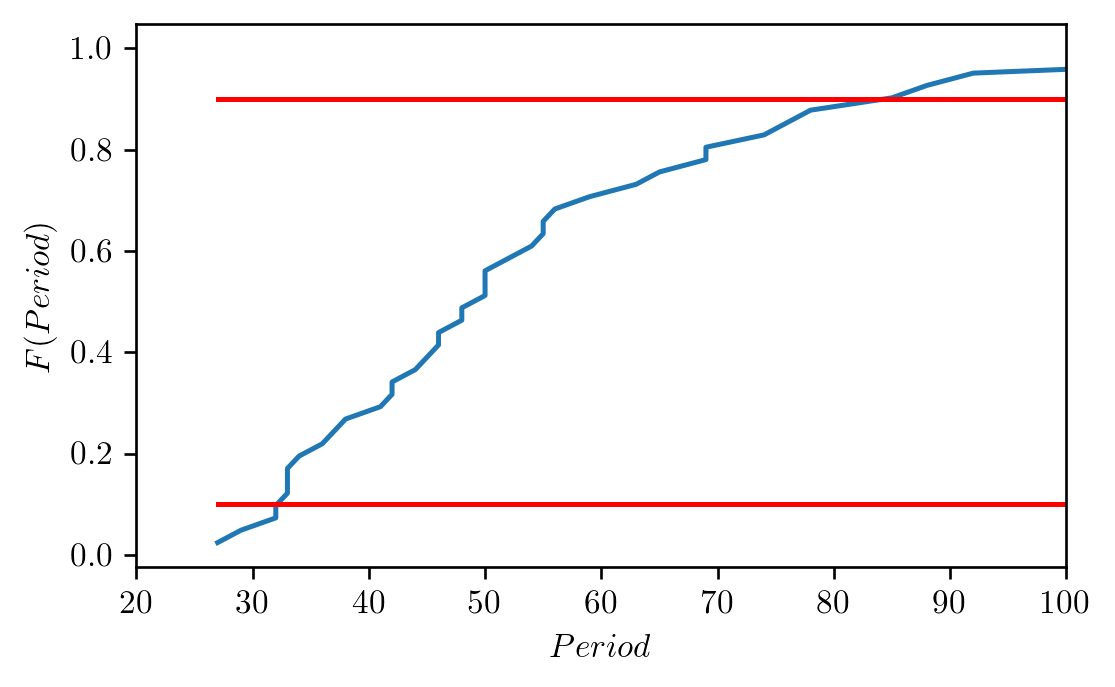

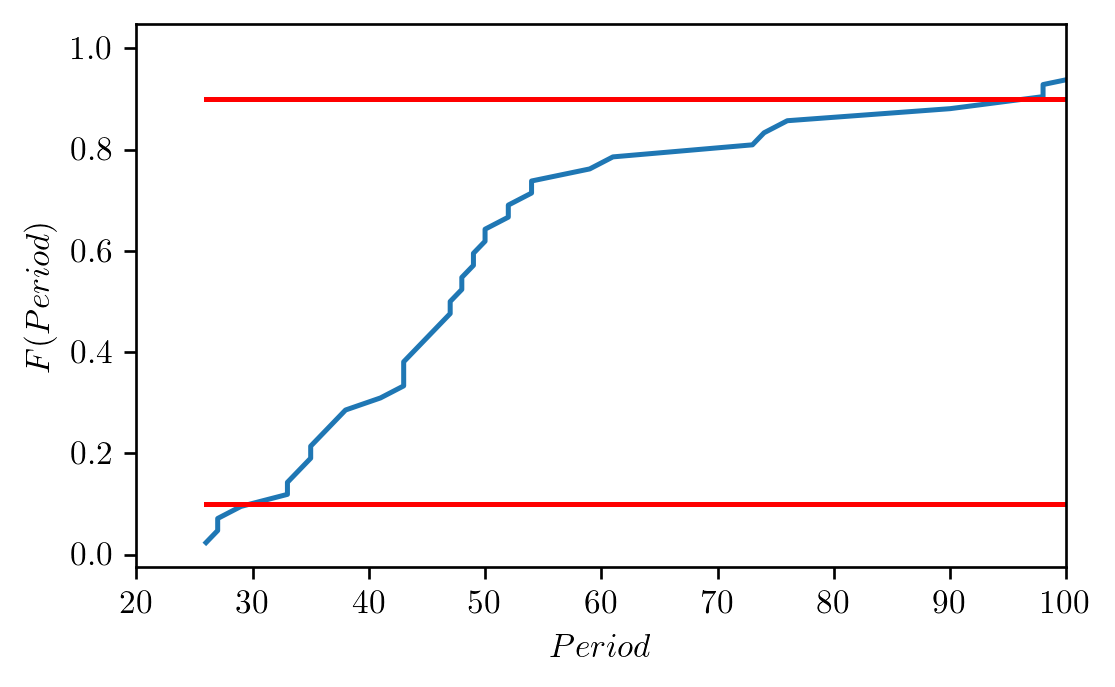

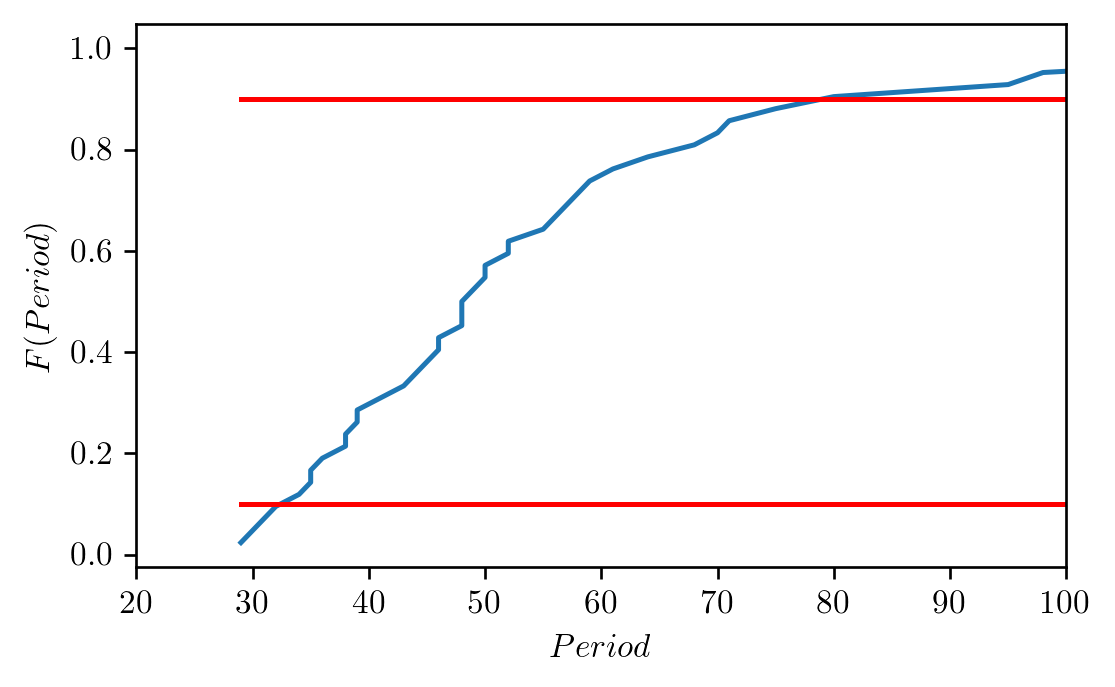

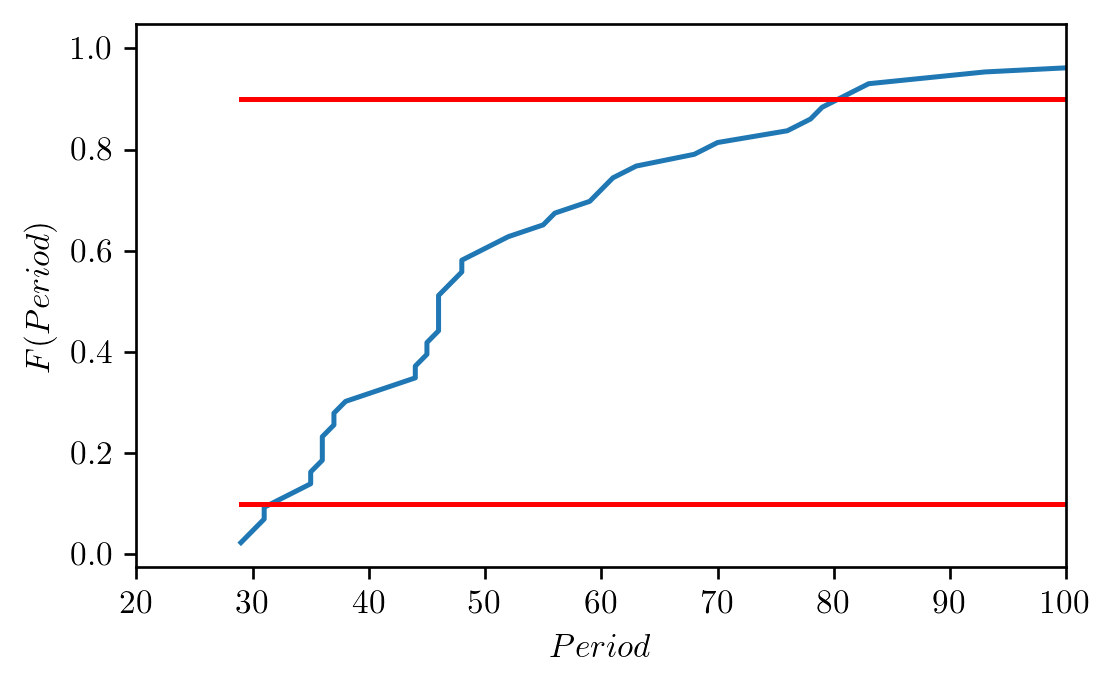

In [11]:
for block in range(10):
    indDownS = np.argwhere(dS[:, block] == -1)
    indDownS = np.reshape(indDownS, len(indDownS))

    arPeriods = indDownS[1:] - indDownS[:-1]
    arPeriods = np.reshape(arPeriods, len(arPeriods))
    

    arPeriods = np.sort(arPeriods, axis=0)
    
    mean = np.mean(arPeriods)
    arMean = np.ones(len(arPeriods)) * mean
    low = np.ones(len(arPeriods)) * .1
    high = np.ones(len(arPeriods)) * .9
    sd = np.sqrt(np.sum((arMean - arPeriods) ** 2) / (len(arPeriods) - 1))
    print('Mean period [' + repr(block) + ']: ' + repr(round(mean)))
    print('Standard deviation [' + repr(block) + ']: ' + repr(round(sd)))
    
#     plt.plot(arPeriods, 'bo')
#     plt.show()

#     kalmanS = np.zeros(len(arPeriods))
#     kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),transition_covariance=0.01 * np.eye(2))
#     states_pred = kf.em(arPeriods).smooth(arPeriods)[0]
#     kalmanS = states_pred[:, 0]

#     print(kalmanT)

#     plt.plot(kalmanS, 'ro')
#     plt.show()
#     arPeriods = kalmanS

#     print(np.shape(arPeriods))

    prob = np.zeros(len(arPeriods), dtype=int)
    for index in range(len(arPeriods)):
        p = arPeriods[index]
        prob[index] = np.count_nonzero(arPeriods[:index+1] <= p)

    prob = prob / np.max(prob)
    
    limitsMax = prob < .9
    limitsMin = prob > .1
    limitsBoth = limitsMax * limitsMin
    limits = np.argwhere(limitsBoth == True)
    qdown = arPeriods[np.min(limits)]
    qup = arPeriods[np.max(limits)]
    print('Lower CI boundary [' + repr(block) + ']: ' + repr(qdown))
    print('Upper CI boundary [' + repr(block) + ']: ' + repr(qup))
    print('Last failure in dataset [' + repr(block) + ']: ' + repr(indDownS[-1]))


    if(indDownS[-1] + int(mean) < 2401):
        first_pred = 2401
        second_pred = 2401 + mean
    else:
        first_pred = indDownS[-1] + int(mean)
        second_pred = indDownS[-1] + 2 * int(mean)
    
    print('Failure prediction 1 [' + repr(block) + ']: ' + repr(int(first_pred)))
    print('Failure prediction 2 [' + repr(block) + ']: ' + repr(int(second_pred)))
    
    
#     print('Mean period : ' + repr(mean))
#     print('Standard deviation : ' + repr(sd))

#     kalmanP = np.zeros(len(prob))
#     kf = KalmanFilter(transition_matrices=np.array([[1, .1], [0, 1]]),transition_covariance=0.1 * np.eye(2))
#     states_pred = kf.em(prob).smooth(prob)[0]
#     kalmanP = states_pred[:, 0]

    # plt.plot(arPeriods, np.clip(prob, .1, .9))
    fig, ax = plt.subplots(figsize=(5, 3), dpi=240)
    plt.plot(arPeriods, prob)
    plt.plot(arPeriods, low, 'r-')
    plt.plot(arPeriods, high, 'r-')
    plt.xlim(left=20)
    plt.xlim(right=100)
    plt.xlabel(r'$Period$')
    plt.ylabel(r'$F(Period)$')
    plt.savefig('plots/' + repr(block) + 'F(period)-' 
                + repr(round(mean)) + '-mean-' + repr(round(sd)) + '-sd-' 
                + repr(round(qdown)) + '-qdown-' + repr(round(qup)) + '-qup.png')